## Machine Learning HW1 Problem 2

0845209 . Siméon Gaumart



# question a

In [16]:
#importing libs
%matplotlib inline
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from copy import deepcopy

In [17]:
#importing datas
try:
    continueProg = True
    data = pd.read_csv('./MEAP93.csv')
    math10=data["math10"].values
    lnchprg=data["lnchprg"].values
except:
    continueProg = False
    print("error : read data fails")
    print("please put datas on the same folder")


math10 = 32.14271164450065 + -0.31886428597057154 * lnchprg


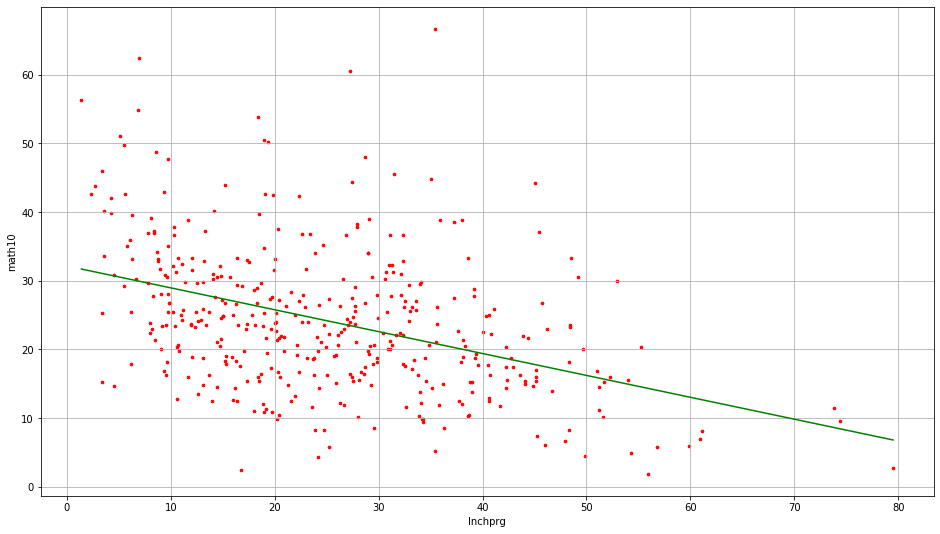

In [18]:
#linear regression

if continueProg :
    
    def lossFunction(x,y,b0,b1):
        nx=len(x)
        ny=len(y)
        S=0
        if nx == ny :
            for i in range (0,nx):
                S=S+(y[i]-(b0+x[i]*b1))**2
            return S
        else :
            return False
        
    def dLossFunctionB0(x,y):
        nx=len(x)
        ny=len(y)
        coeffB0=0
        coeffB1=0
        coeffN=0
        if nx == ny :
            for i in range (0,nx):
                coeffB0=coeffB0+2
                coeffB1=coeffB1+2*x[i]
                coeffN=coeffN+(-2)*y[i]
            return coeffB0, coeffB1, coeffN
        else :
            return False
        
    def dLossFunctionB1(x,y):
        nx=len(x)
        ny=len(y)
        coeffB0=0
        coeffB1=0
        coeffN=0
        if nx == ny :
            for i in range (0,nx):
                coeffB0=coeffB0+2*x[i]
                coeffB1=coeffB1+2*x[i]*x[i]
                coeffN=coeffN+(-2)*y[i]*x[i]
            return coeffB0, coeffB1, coeffN
        else :
            return False
    
    def LinearReg(lnchprgf,math10f):
        dB0coeffB0, dB0coeffB1, dB0coeffN = dLossFunctionB0(lnchprgf,math10f)
        dB1coeffB0, dB1coeffB1, dB1coeffN = dLossFunctionB1(lnchprgf,math10f)

        A = np.array([[dB0coeffB0, dB0coeffB1],[dB1coeffB0, dB1coeffB1]])
        C = np.array([-dB0coeffN, -dB1coeffN])
        B = np.linalg.solve(A,C)

        B0f = B[0]
        B1f = B[1]
        
        print("math10 = "+str(B0f)+" + "+str(B1f)+" * lnchprg")
              
        return B0f, B1f
    
    B0, B1 = LinearReg(lnchprg,math10)
    
    
    
    def Afficher(lnchprga,math10a,B0a,B1a):
        fig=plt.figure(figsize=(16,9))
        ax = fig.add_subplot(111)
        ax.scatter(lnchprga,math10a,c='r',s=7)
        Lx=[np.min(lnchprga),np.max(lnchprga)]
        Ly=[]
        for i in range (0,len(Lx)):
            Ly.append(B1a*Lx[i]+B0a)
        ax.plot(Lx,Ly,c='g')
        ax.set_ylabel('math10')
        ax.set_xlabel('lnchprg')
        plt.grid()
        plt.show()
    
    Afficher(lnchprg,math10,B0,B1)
    

In [20]:
#we find the same result with polyfit
Bpf = np.polyfit(lnchprg,math10,1)
print("math10 = "+str(Bpf[1])+" + "+str(Bpf[0])+" * lnchprg")

math10 = 32.14271164450049 + -0.3188642859705656 * lnchprg


In [21]:
#R squared
math10exp=B0+lnchprg*B1
rsq = 1 - (sum(pow((math10-math10exp),2))/(len(math10)*np.var(math10)))
print("R² = ",rsq)

R² =  0.1710340964985374


In [22]:
from scipy.stats import *
print(linregress(lnchprg,math10))
print("R² = ",(linregress(lnchprg,math10)[2])**2)

LinregressResult(slope=-0.31886428597056565, intercept=32.142711644500494, rvalue=-0.41356268750763575, pvalue=2.7466090396188826e-18, stderr=0.0348393342585019)
R² =  0.17103409649853837


# question d

In [23]:
expend = data["expend"].values
logexpend = np.log10(expend)

In [24]:
#linear regression

X = np.ones((len(lnchprg),3))
for i in range (0,len(lnchprg)):
    X[i,1]=logexpend[i]
    X[i,2]=lnchprg[i]
Y = math10.reshape((len(math10),1))

Xt=np.transpose(X)
Bd = ((np.linalg.inv(Xt.dot(X))).dot(Xt)).dot(Y) #Bd=(Xt*X)^⁻1*Xt*Y

print("math10 = "+str(Bd[0,0])+" + "+str(Bd[1,0])+" * log(expend) + "+str(Bd[2,0])+" * lnchprg")



math10 = -20.360816474189132 + 14.344410366129082 * log(expend) + -0.30458530220642444 * lnchprg


In [28]:
#3D plot 

%matplotlib qt 
#^-- for a dynamic plot

fig=plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(logexpend,lnchprg,math10)

Lle=np.arange(min(logexpend),max(logexpend),0.01)
Llp=np.arange(min(lnchprg),max(lnchprg),1)
Lle,Llp=np.meshgrid(Lle,Llp)

Lm10 = Bd[0,0]+Bd[1,0]*Lle+Bd[2,0]*Llp
ax.plot_surface(Lle,Llp,Lm10,cmap=cm.coolwarm)

ax.set_zlabel('math10')
ax.set_xlabel('log(expend)')
ax.set_ylabel('lnchprg')

plt.show()

In [29]:
#R squared
math10exp2=Bd[0,0]+logexpend*Bd[1,0]+lnchprg*Bd[2,0]
rsq2 = 1 - (sum(pow((math10-math10exp2),2))/(len(math10)*np.var(math10)))
print("R² = ",rsq2)

R² =  0.17992710085133723
